In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('c:/Users/meghana/Downloads/Project/CSV/newborn_health_monitoring_with_risk.csv')
pd.set_option('display.max_columns', 100)
df.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,10-12-2024,1.0,3.28,50.1,32.0,37.0,160.0,36.0,98.0,Formula,11.0,9.0,0.0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,11-12-2024,2.0,3.35,50.2,32.0,37.2,156.0,40.0,99.0,Formula,11.0,5.0,2.0,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,12-12-2024,3.0,3.35,50.6,32.1,37.1,137.0,37.0,97.0,Breastfeeding,7.0,6.0,5.0,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,13-12-2024,4.0,3.48,50.3,32.0,37.4,130.0,33.0,97.0,Mixed,11.0,8.0,4.0,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,14-12-2024,5.0,3.50,50.3,31.8,36.8,138.0,39.0,96.0,Breastfeeding,11.0,7.0,1.0,11.6,NaN,No,Yes,At Risk


In [3]:
df['baby_id'].nunique()

100

#### Total Babies: 100

In [4]:
df['apgar_score'].isna().sum()

2900

In [5]:
df.groupby('baby_id')['date'].count().sort_values(ascending = False)

baby_id
B051    30
B076    30
B074    30
B073    30
B072    30
        ..
B031    30
B030    30
B004    30
B002    26
B001    25
Name: date, Length: 100, dtype: int64

#### Health of each baby is monitored for 30 days

In [6]:
df[df.duplicated()]

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
10,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Healthy
11,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Healthy
12,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Healthy
35,B002,Nicole,Female,39.4,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Healthy


In [7]:
df['risk_level'].value_counts()

risk_level
Healthy    2602
At Risk     398
Name: count, dtype: int64

In [8]:
round((df['risk_level'].value_counts() / df['risk_level'].count()) * 100, 1)

risk_level
Healthy    86.7
At Risk    13.3
Name: count, dtype: float64

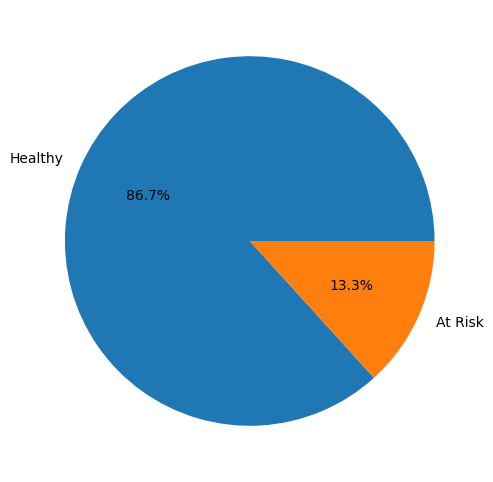

In [9]:
plt.figure(figsize= (10,6))
plt.pie(df['risk_level'].value_counts(), autopct = '%1.1f%%', labels= df['risk_level'].value_counts().index)
plt.show()

##  Dataset is highly imbalanced


In [10]:
df.isnull().sum()  

baby_id                           0
name                              0
gender                            5
gestational_age_weeks             5
birth_weight_kg                   5
birth_length_cm                   9
birth_head_circumference_cm       9
date                              9
age_days                          9
weight_kg                         9
length_cm                         9
head_circumference_cm             9
temperature_c                     9
heart_rate_bpm                    9
respiratory_rate_bpm              9
oxygen_saturation                 9
feeding_type                      9
feeding_frequency_per_day         9
urine_output_count                9
stool_count                       9
jaundice_level_mg_dl              9
apgar_score                    2900
immunizations_done                4
reflexes_normal                   0
risk_level                        0
dtype: int64

## Preprocessing

In [11]:
df[df['birth_length_cm'].isna()]

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
8,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Healthy
9,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Healthy
10,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Healthy
11,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,Healthy
12,B001,Sara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Healthy
32,B002,Nicole,Female,39.4,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,At Risk
33,B002,Nicole,Female,39.4,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,At Risk
34,B002,Nicole,Female,39.4,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Healthy
35,B002,Nicole,Female,39.4,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Healthy


In [12]:
for i in ['gender',	'gestational_age_weeks', 'birth_weight_kg',	'birth_length_cm',	'birth_head_circumference_cm', 'apgar_score']:
    df[i].ffill(inplace= True)

In [13]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['date'].dtype

dtype('<M8[ns]')

In [14]:
df.loc[7:13, ['name', 'date', 'age_days', 'weight_kg', 	'length_cm',  'head_circumference_cm',	'temperature_c', 'heart_rate_bpm',	'respiratory_rate_bpm',	 'oxygen_saturation', 'feeding_type', 'feeding_frequency_per_day',	'urine_output_count', 'stool_count', 'jaundice_level_mg_dl']]

,name,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl
7,Sara,2024-12-17,8.0,3.57,50.3,32.1,36.7,133.0,40.0,98.0,Formula,7.0,7.0,2.0,2.1
8,Sara,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sara,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Sara,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Sara,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Sara,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Sara,2024-12-23,14.0,3.77,50.7,32.2,36.8,128.0,44.0,97.0,Mixed,7.0,4.0,0.0,3.9


In [15]:
df.loc[31:36, ['name', 'date', 'age_days']]

,name,date,age_days
31,Nicole,2025-07-29,2.0
32,Nicole,NaT,NaN
33,Nicole,NaT,NaN
34,Nicole,NaT,NaN
35,Nicole,NaT,NaN
36,Nicole,2025-08-03,7.0


In [16]:
df['age_days'].interpolate(method = 'linear', inplace = True)
df['date'].interpolate(method= 'linear',inplace = True)

In [17]:
df.loc[31:36, ['name', 'date', 'age_days']]

,name,date,age_days
31,Nicole,2025-07-29,2.0
32,Nicole,2025-07-30,3.0
33,Nicole,2025-07-31,4.0
34,Nicole,2025-08-01,5.0
35,Nicole,2025-08-02,6.0
36,Nicole,2025-08-03,7.0


Text(0, 0.5, 'Avg jaundice level in mg/dl')

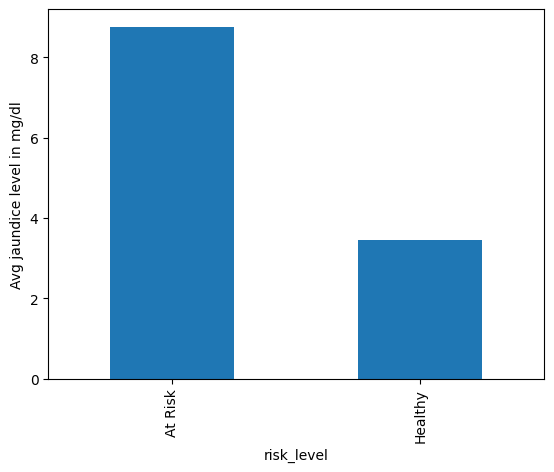

In [18]:
df.groupby('risk_level')['jaundice_level_mg_dl'].mean().plot.bar()

plt.ylabel('Avg jaundice level in mg/dl')

The avg jaundice_level for healthy --> 3.45

for At risk --> 8.7

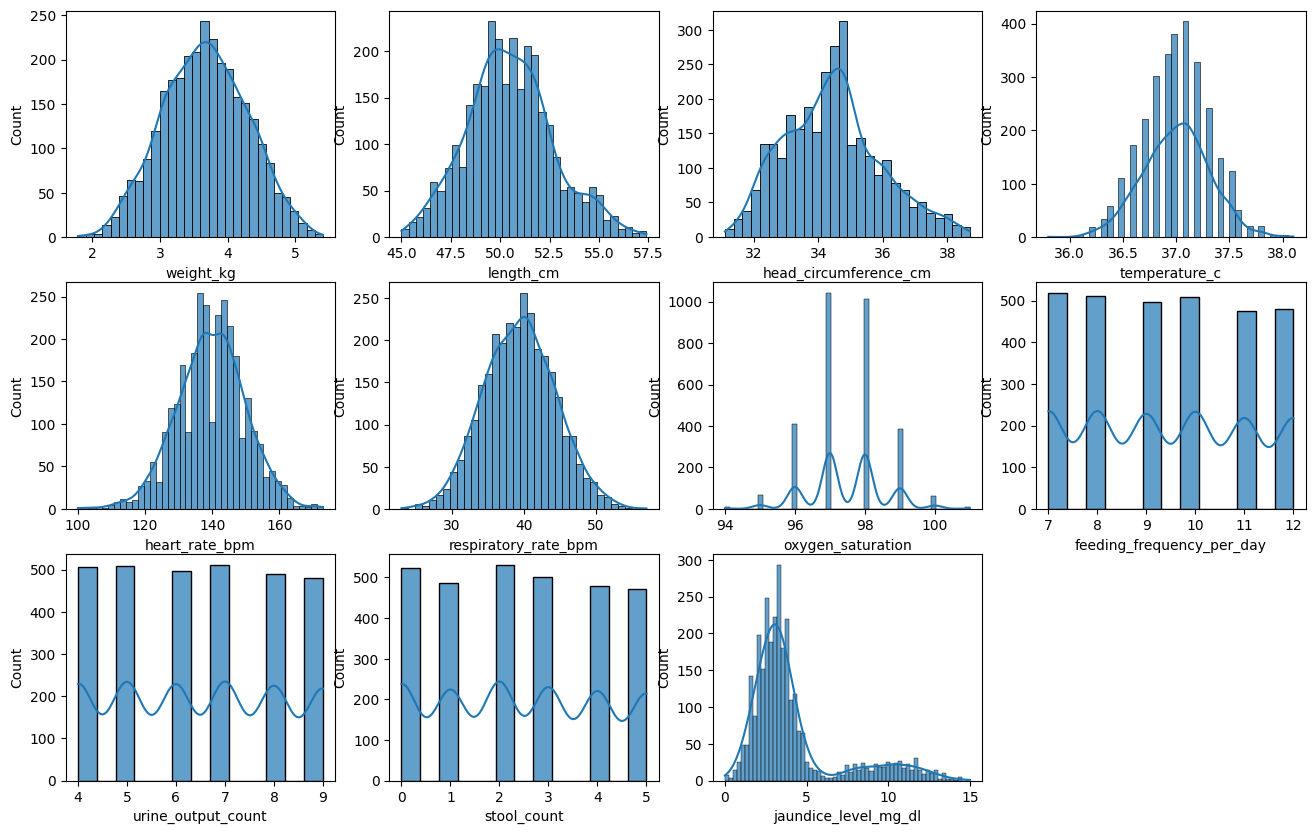

In [19]:
plt.figure(figsize = (16,10))

for idx,i in enumerate(['weight_kg', 	'length_cm',  	'head_circumference_cm',	'temperature_c',	'heart_rate_bpm',	'respiratory_rate_bpm',	 'oxygen_saturation',	'feeding_frequency_per_day',	'urine_output_count',	'stool_count',	'jaundice_level_mg_dl']):
    plt.subplot(3,4, idx+1)
    sns.histplot(df[i], kde= True, alpha= 0.7)
    # sns.kdeplot(df[i], alpha = 1)
    
plt.show()

In [20]:
df.loc[28:38,['name','immunizations_done']]

,name,immunizations_done
28,Sara,No
29,Sara,Yes
30,Nicole,Yes
31,Nicole,No
32,Nicole,NaN
33,Nicole,NaN
34,Nicole,NaN
35,Nicole,NaN
36,Nicole,No
37,Nicole,No


In [21]:
df['immunizations_done'].fillna('No', inplace= True)

##### Replacing Na for each baby with mean of that baby

In [22]:
df.loc[df['baby_id'] == 'B001', ['weight_kg','length_cm', 'head_circumference_cm', 'temperature_c']].head(10)

,weight_kg,length_cm,head_circumference_cm,temperature_c
0,3.28,50.1,32.0,37.0
1,3.35,50.2,32.0,37.2
2,3.35,50.6,32.1,37.1
3,3.48,50.3,32.0,37.4
4,3.50,50.3,31.8,36.8
5,3.46,50.7,32.1,37.3
6,3.53,50.9,32.0,37.0
7,3.57,50.3,32.1,36.7
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [23]:
df.loc[df['baby_id'] == 'B001', 'weight_kg'] = df.loc[df['baby_id'] == 'B001', 'weight_kg'].fillna(round(df.loc[df['baby_id'] == 'B001','weight_kg'].mean(), 2))
df.loc[df['baby_id'] == 'B002', 'weight_kg'] = df.loc[df['baby_id'] == 'B002', 'weight_kg'].fillna(round(df.loc[df['baby_id'] == 'B002', 'weight_kg'].mean(), 2))

In [24]:
df.loc[df['baby_id'] == 'B002', ['weight_kg']].head(10)

,weight_kg
30,3.17
31,3.27
32,3.67
33,3.67
34,3.67
35,3.67
36,3.33
37,3.38
38,3.40
39,3.53


In [25]:
for i in ['length_cm',	'head_circumference_cm', 'temperature_c']:
    df[i].fillna(round(df.groupby('baby_id')[i].transform('mean'), 1), inplace= True)

<Axes: ylabel='heart_rate_bpm'>

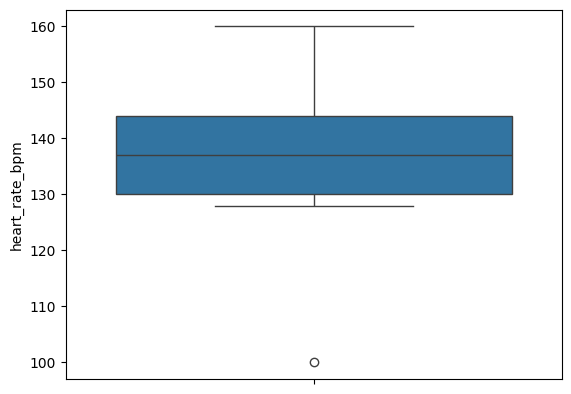

In [26]:
sns.boxplot(df.loc[df['baby_id'] == 'B001']['heart_rate_bpm'])

<Axes: ylabel='respiratory_rate_bpm'>

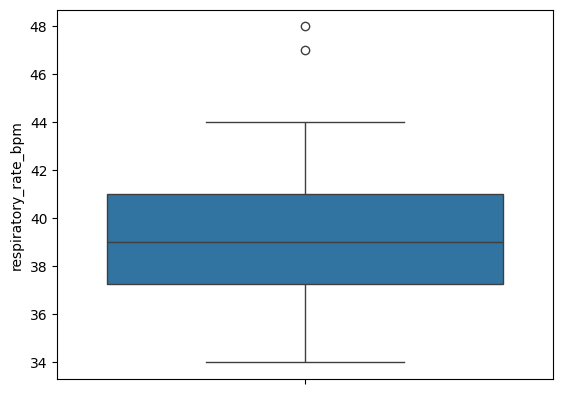

In [27]:
sns.boxplot(df.loc[df['baby_id'] == 'B002']['respiratory_rate_bpm'])

In [28]:
df.loc[df['baby_id'] == 'B001']['oxygen_saturation'].value_counts()

oxygen_saturation
97.0     8
98.0     7
99.0     6
96.0     3
100.0    1
Name: count, dtype: int64

<Axes: xlabel='feeding_frequency_per_day', ylabel='Count'>

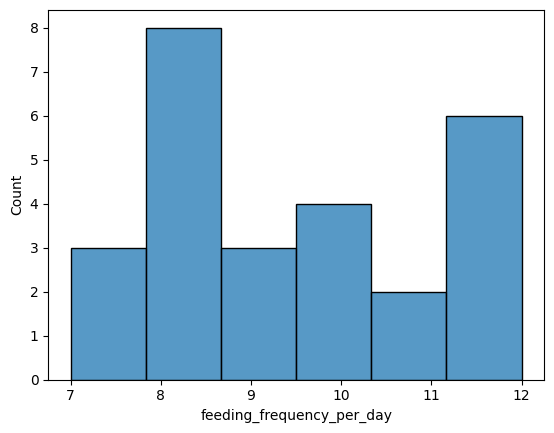

In [29]:
sns.histplot(df.loc[df['baby_id'] == 'B002', 'feeding_frequency_per_day'])

<Axes: xlabel='urine_output_count', ylabel='Count'>

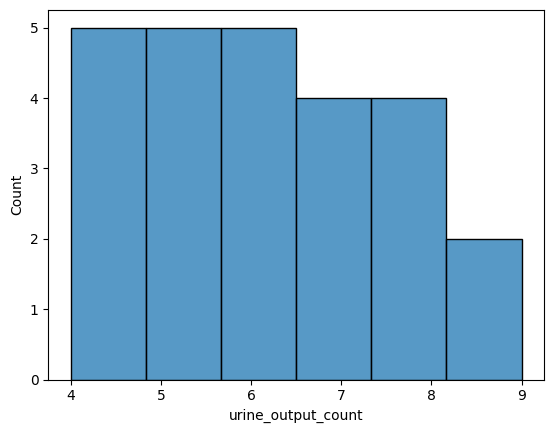

In [30]:
sns.histplot(df.loc[df['baby_id'] == 'B001']['urine_output_count'])

<Axes: xlabel='stool_count', ylabel='Count'>

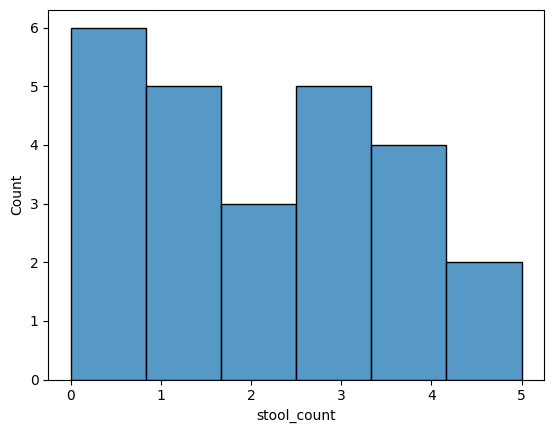

In [31]:
sns.histplot(df.loc[df['baby_id'] == 'B001']['stool_count'])

<Axes: ylabel='jaundice_level_mg_dl'>

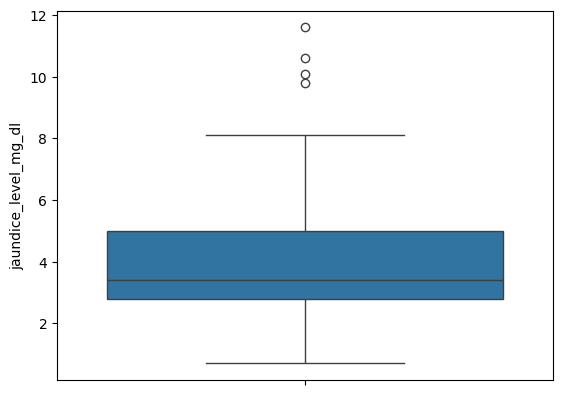

In [32]:
sns.boxplot(df.loc[df['baby_id'] == 'B001', 'jaundice_level_mg_dl'])

In [33]:
for i in ['heart_rate_bpm','respiratory_rate_bpm', 'oxygen_saturation']:
    df[i].fillna(round(df.groupby('baby_id')[i].transform('median')), inplace= True)

In [34]:
for i in ['feeding_frequency_per_day', 'urine_output_count', 'stool_count', 'jaundice_level_mg_dl']:
    df[i].fillna(df.groupby('baby_id')[i].transform('median'), inplace= True)

In [35]:
df['feeding_type'].value_counts()

feeding_type
Breastfeeding    1006
Formula           996
Mixed             989
Name: count, dtype: int64

In [36]:
df['feeding_type'].fillna(df['feeding_type'].mode()[0], inplace= True)

In [37]:
df.isna().sum()

baby_id                        0
name                           0
gender                         0
gestational_age_weeks          0
birth_weight_kg                0
birth_length_cm                0
birth_head_circumference_cm    0
date                           0
age_days                       0
weight_kg                      0
length_cm                      0
head_circumference_cm          0
temperature_c                  0
heart_rate_bpm                 0
respiratory_rate_bpm           0
oxygen_saturation              0
feeding_type                   0
feeding_frequency_per_day      0
urine_output_count             0
stool_count                    0
jaundice_level_mg_dl           0
apgar_score                    0
immunizations_done             0
reflexes_normal                0
risk_level                     0
dtype: int64

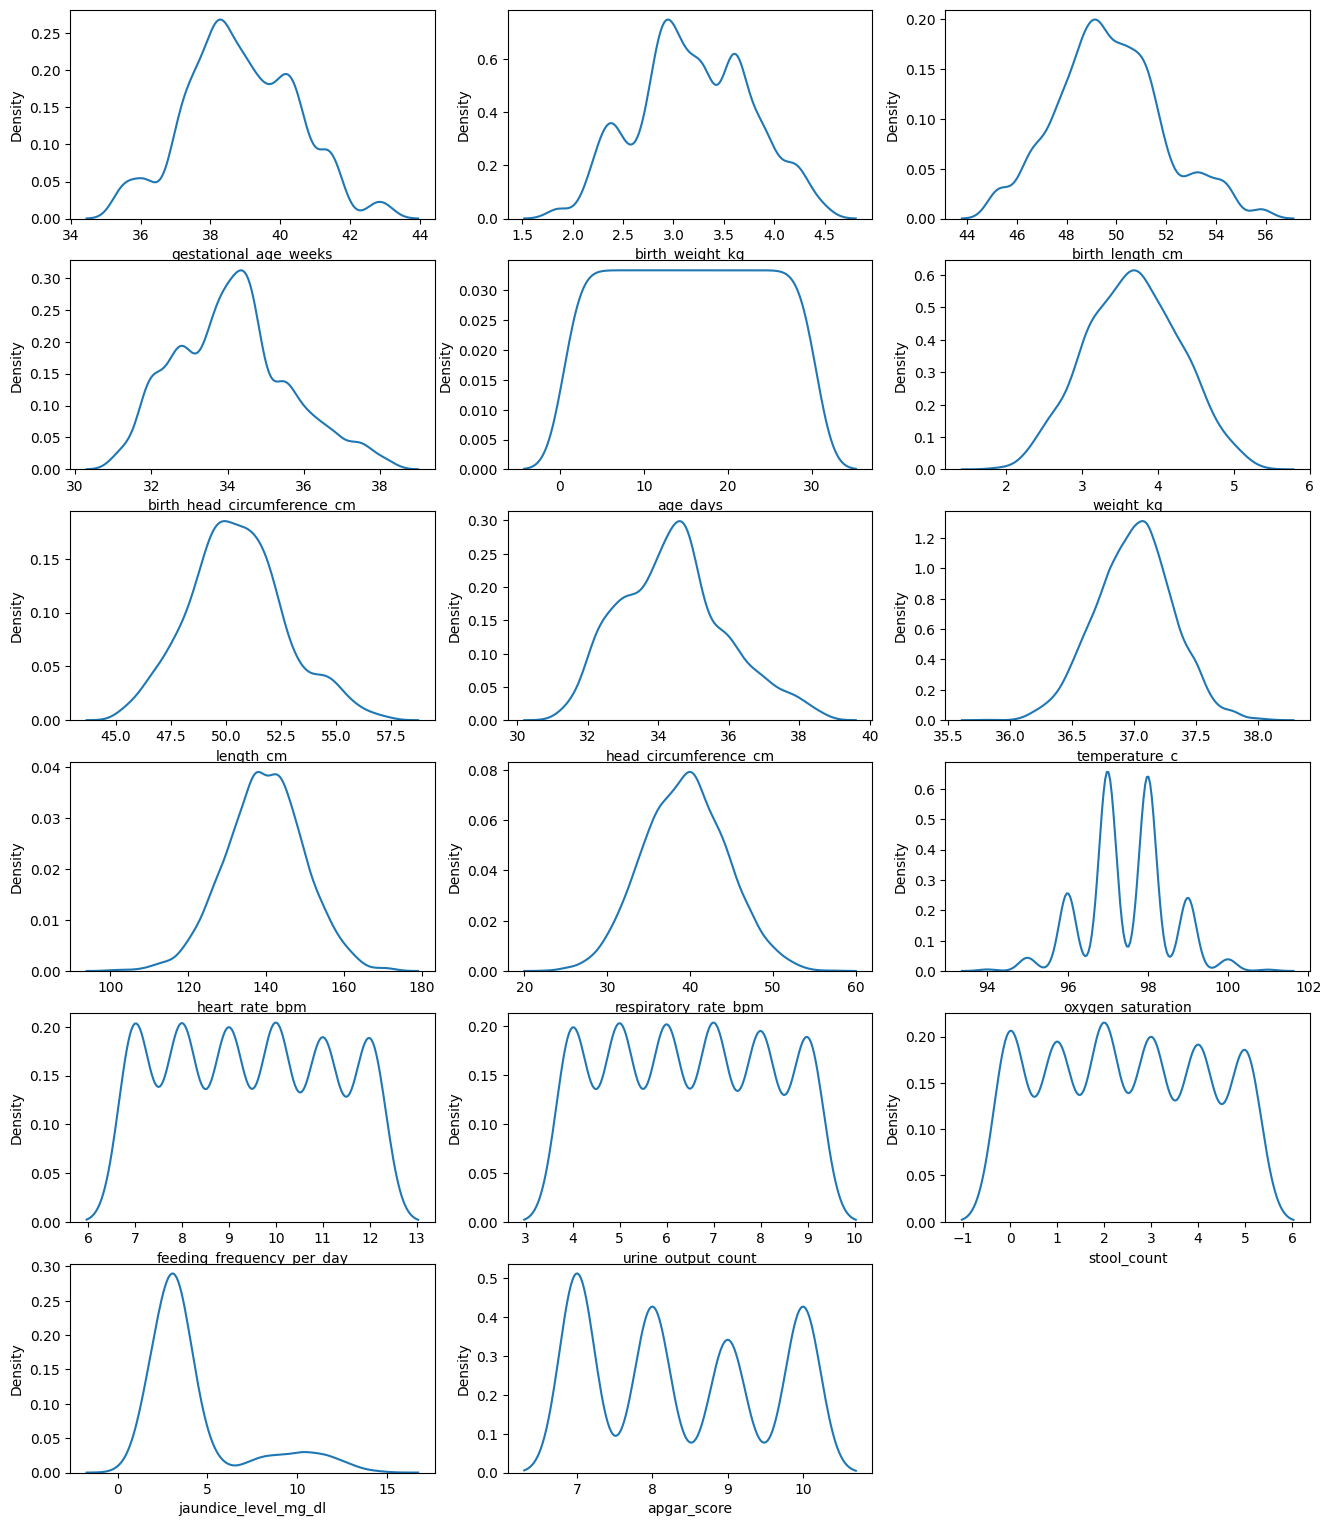

In [38]:
plt.figure(figsize = (16, 19))

for idx, i in enumerate(df.select_dtypes(include= 'number').columns):
    plt.subplot(6,3, idx+1)
    
    sns.kdeplot(df[i], alpha = 1)

In [39]:
len(df.select_dtypes(include= 'number').columns)

17

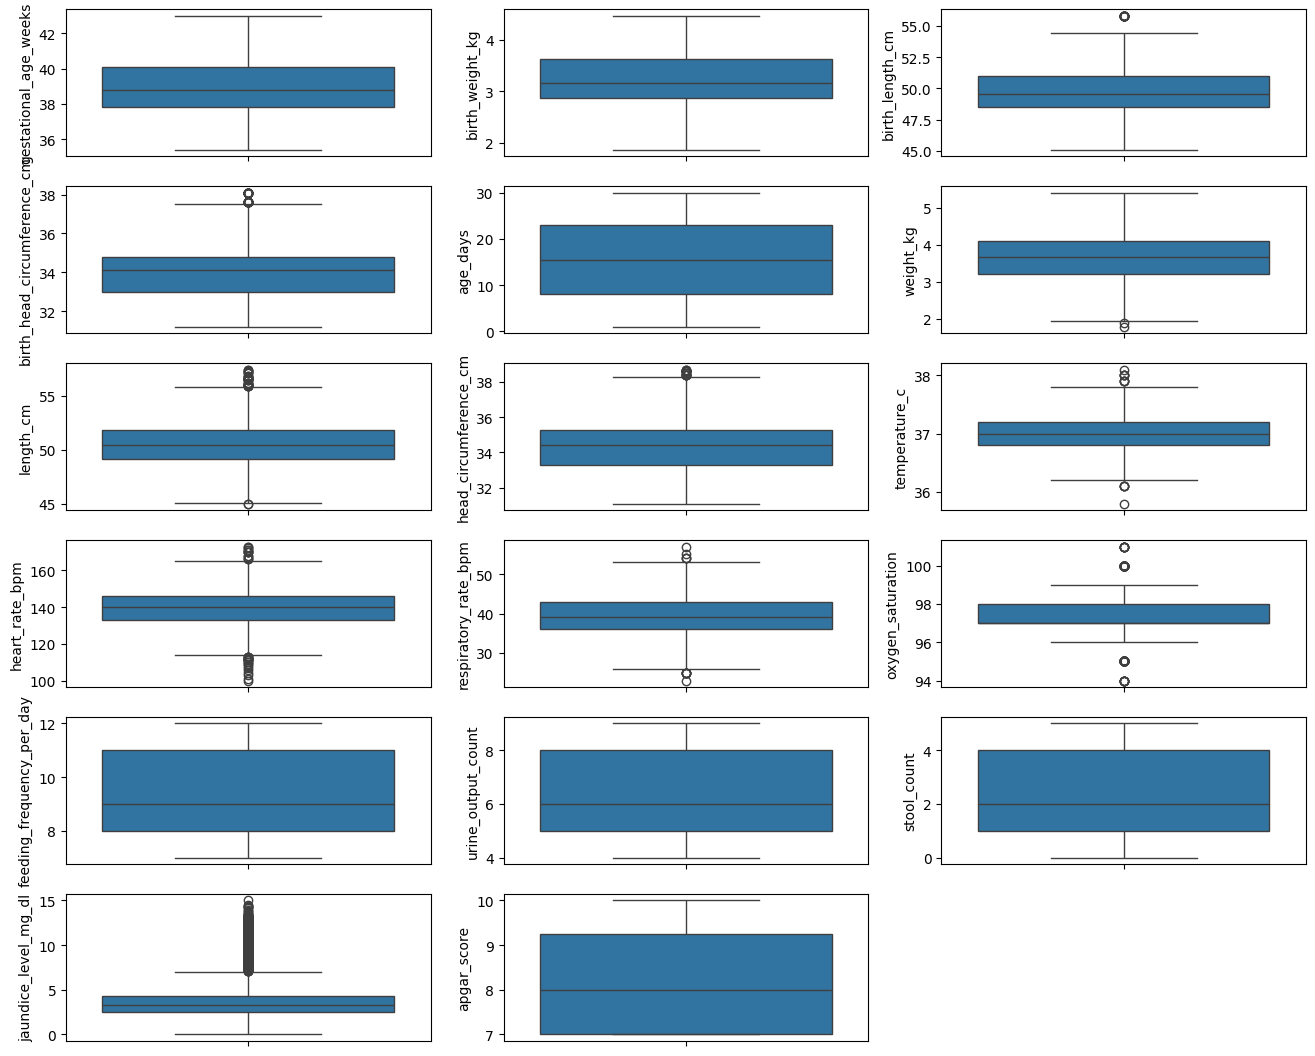

In [40]:
plt.figure(figsize = (16, 18))

for idx, i in enumerate(df.select_dtypes(include= 'number').columns):
    plt.subplot(8,3, idx+1)
    
    sns.boxplot(df[i])

In [41]:
df[df['oxygen_saturation'] < 95.5][['risk_level']].head(10)

,risk_level
63,At Risk
75,At Risk
87,At Risk
102,At Risk
105,At Risk
156,At Risk
158,At Risk
182,At Risk
188,At Risk
258,At Risk


In [42]:
df[df['oxygen_saturation'] < 95.5][['risk_level']].value_counts()

risk_level
At Risk       77
Name: count, dtype: int64

In [43]:
df[df['oxygen_saturation'] > 100][['risk_level']].value_counts()

risk_level
Healthy       5
At Risk       2
Name: count, dtype: int64

### oxygen < 95.5 --->  at risk

In [44]:
df[df['heart_rate_bpm'] >= 160][['risk_level']].value_counts()

risk_level
At Risk       70
Name: count, dtype: int64

### heart_rate_bpm > 160 ---> At Risk

In [45]:
df[df['temperature_c'] > 37.9][['risk_level']].value_counts()

risk_level
At Risk       5
Name: count, dtype: int64

### temperature >= 38 ---> At Risk

In [46]:
cols_capp = [
    'jaundice_level_mg_dl', 'birth_head_circumference_cm', 'length_cm',
    'heart_rate_bpm', 'birth_length_cm', 'head_circumference_cm',
    'temperature_c', 'respiratory_rate_bpm', 'weight_kg'
]

for i in cols_capp:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    
    IQR = q3 - q1
    
    upper_bound = q3 + 1.5 *IQR
    lower_bound = q1 - 1.5 *IQR
    
    if i == 'temperature_c' or i == 'heart_rate_bpm':
        df[i].clip(lower = lower_bound, inplace= True)
    else:
        df[i].clip(lower = lower_bound, upper = upper_bound, inplace= True)

In [47]:
df['oxygen_saturation'] = np.where((df['oxygen_saturation'] > 100), 100, df['oxygen_saturation'])

#### After capping

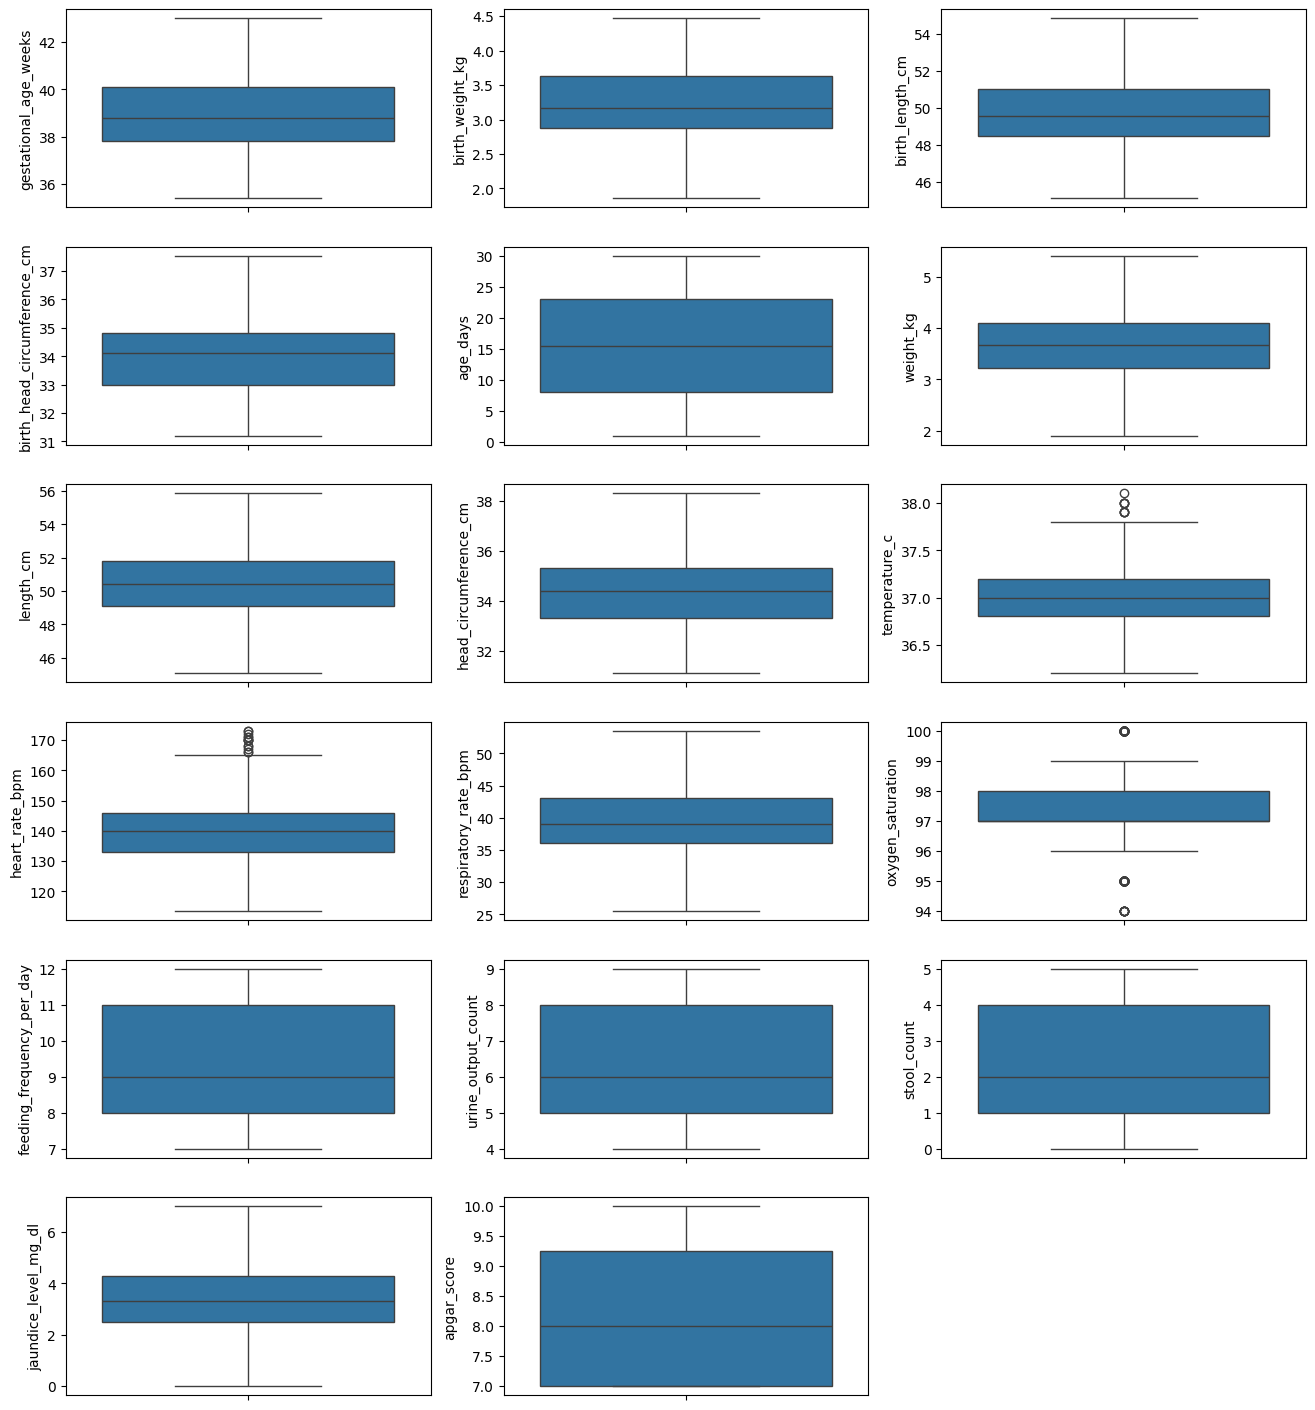

In [48]:
plt.figure(figsize = (16, 18))

for idx, i in enumerate(df.select_dtypes(include= 'number').columns):
    plt.subplot(6,3, idx+1)
    
    sns.boxplot(df[i])

In [49]:
for i in df.select_dtypes(include= 'object').columns:
    print(i)

baby_id
name
gender
feeding_type
immunizations_done
reflexes_normal
risk_level


## Encoding

In [50]:
# Binary encoding for Yes/No or two-class variables

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})                    
df['immunizations_done'] = df['immunizations_done'].map({'No': 0, 'Yes': 1})
df['reflexes_normal'] = df['reflexes_normal'].map({'No': 0, 'Yes': 1})

In [51]:
df = pd.get_dummies(df, columns=['feeding_type'])

In [52]:
df.replace({True: 1, False: 0}, inplace= True)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['risk_level_encoded'] = le.fit_transform(df['risk_level'])

In [54]:
df.head(3)

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed,risk_level_encoded
0,B001,Sara,1,40.2,3.3,50.0,31.9,2024-12-10,1.0,3.28,50.1,32.0,37.0,160.0,36.0,98.0,11.0,9.0,0.0,4.2,7.0,1,1,At Risk,0,1,0,0
1,B001,Sara,1,40.2,3.3,50.0,31.9,2024-12-11,2.0,3.35,50.2,32.0,37.2,156.0,40.0,99.0,11.0,5.0,2.0,7.0,7.0,0,0,At Risk,0,1,0,0
2,B001,Sara,1,40.2,3.3,50.0,31.9,2024-12-12,3.0,3.35,50.6,32.1,37.1,137.0,37.0,97.0,7.0,6.0,5.0,7.0,7.0,0,0,Healthy,1,0,0,1


#### X, Y

In [55]:
x = df.drop(columns= ['baby_id', 'name', 'date', 'risk_level', 'risk_level_encoded'], axis= 1)
y = df['risk_level_encoded']

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, stratify= y)

In [57]:
y_train.value_counts()

risk_level_encoded
1    2082
0     318
Name: count, dtype: int64

#### class ( 1 ) -> Healthy
#### class ( 0 ) -> At Risk

# Model Building

In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight= 'balanced', max_iter= 10000, random_state = 42)
LR.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [59]:
print("Training score", LR.score(x_train, y_train))

Training score 0.8270833333333333


In [60]:
print("Testing score", LR.score(x_test, y_test))

Testing score 0.8483333333333334


In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(class_weight= 'balanced',
 bootstrap =  True,
 max_depth = 20,
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 100,  random_state= 42)

rfc2.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, random_state=42)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [63]:
y_pred_rfc2 = rfc2.predict(x_test)

print('accuracy_score', accuracy_score(y_test, y_pred_rfc2))
print('f1_score (class 0)', f1_score(y_test, y_pred_rfc2, pos_label= 0))

accuracy_score 0.935
f1_score (class 0) 0.7577639751552795


Text(0.5, 1.0, ' with class weights -> RFC')

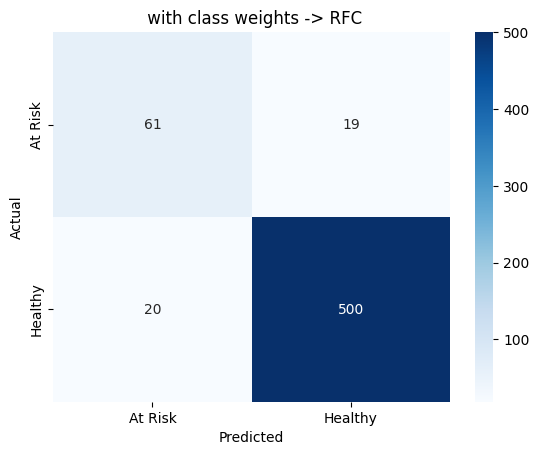

In [64]:
cm = confusion_matrix(y_test, y_pred_rfc2)
sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', xticklabels= ['At Risk', 'Healthy'], yticklabels= ['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' with class weights -> RFC')

In [65]:
print(classification_report(y_test, y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        80
           1       0.96      0.96      0.96       520

    accuracy                           0.94       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.94      0.94      0.94       600



In [66]:
rfc1 = RandomForestClassifier(bootstrap =  True,
 max_depth = None,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 100, random_state= 42)    # without class weight/ scoring = f1_macro

rfc1.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [67]:
y_pred = rfc1.predict(x_test)
f1_score(y_test, y_pred, pos_label= 0)

0.7651006711409396

Text(0.5, 1.0, 'Testing without class weight -> RFC')

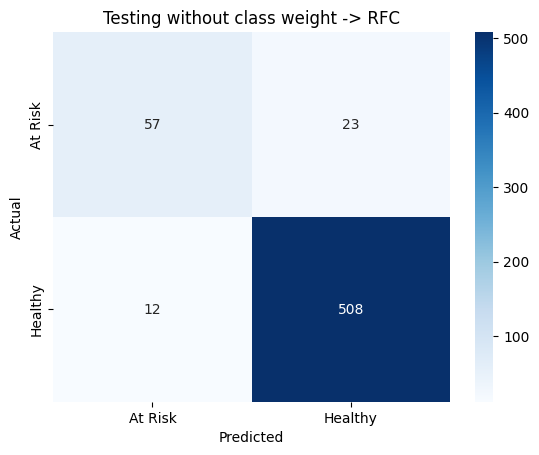

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt = 'd', cmap= 'Blues', xticklabels = ['At Risk', 'Healthy'], yticklabels = ['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing without class weight -> RFC')

In [69]:
# import numpy as np
# from sklearn.metrics import classification_report, precision_recall_curve

# y_proba = rfc1.predict_proba(x_test)[:, 0]   # probability of class 0 (At Risk)

# # --- 2. Precision-Recall curve for At Risk ---
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,0], pos_label=0)

# # --- 3. Compute F1 for each threshold ---
# f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)

# # --- 4. Find best threshold (max F1 for At Risk) ---
# best_idx = np.argmax(f1_scores)
# best_threshold = thresholds[best_idx]

# print(f"Best threshold for At Risk = {best_threshold:.3f}")
# print(f"Best F1-score (At Risk)    = {f1_scores[best_idx]:.3f}")

# # --- 5. Apply threshold to get final predictions ---
# # Predict At Risk if prob(class 0) >= best_threshold
# y_pred_custom = np.where(y_pred_proba[:, 0] >= best_threshold, 0, 1)

# # --- 6. Evaluate with new predictions ---
# print("\n=== Classification Report with Custom Threshold ===")
# print(classification_report(y_test, y_pred_custom, digits=3))


In [70]:
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,0], pos_label=0)  # for 0 (At Risk)
# plt.plot(recall, precision, marker='.')
# plt.xlabel("Recall (Sensitivity)")
# plt.ylabel("Precision")

### XG Boost

In [ ]:
from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
# from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

# Custom scorer for class 0 (At Risk)
f1_class0 = make_scorer(f1_score, pos_label=0)

# Pipeline: SMOTE happens inside each CV fold
pipe = Pipeline([
    ('Edited NN', EditedNearestNeighbours()),
    ('clf', XGBClassifier())
])

param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.05, 0.1],
    'clf__subsample': [0.8],
    'clf__colsample_bytree': [1.0],
    'clf__min_child_weight': [1, 3],
    'clf__gamma': [0, 0.1],
    'clf__reg_alpha': [0.1],
    'clf__reg_lambda': [2.5]    
}
# param_grid = {
#     'clf__n_estimators': [100, 200],  --> 2nd
#     'clf__max_depth': [3, 5],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__subsample': [0.8, 1.0],
#     'clf__colsample_bytree': [0.8, 1.0],
#     'clf__min_child_weight': [1, 3],
#     'clf__gamma': [0, 0.1],
#     'clf__reg_alpha': [0, 0.01],
#     'clf__reg_lambda': [1, 1.5] 
# }
# 'clf__n_estimators': [100, 200, 300],  -> 1st
#     'clf__max_depth': [3, 5],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__subsample': [0.8, 1.0],
#     'clf__colsample_bytree': [0.8, 1.0],
#     'clf__min_child_weight': [1, 3],
#     'clf__gamma': [0, 0.1],
#     'clf__reg_alpha': [0, 0.01, 0.1, 0.5],
#     'clf__reg_lambda': [1, 1.5, 2, 2.5] 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(pipe, param_grid, scoring=f1_class0, cv=cv, n_jobs=-1)
gs.fit(x_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV f1 (class0):", gs.best_score_)

Best params: {'clf__colsample_bytree': 1.0, 'clf__gamma': 0, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__min_child_weight': 3, 'clf__n_estimators': 300, 'clf__reg_alpha': 0.1, 'clf__reg_lambda': 2.5, 'clf__subsample': 0.8}
Best CV f1 (class0): 0.7853784971535976


In [72]:
xgb_pipe_enn = gs.best_estimator_

In [73]:
y_pred__xgb_pipe_enn = xgb_pipe_enn.predict(x_test)

### Threshold = 0.5

Text(0.5, 1.0, 'pipe XGB with Edited NN')

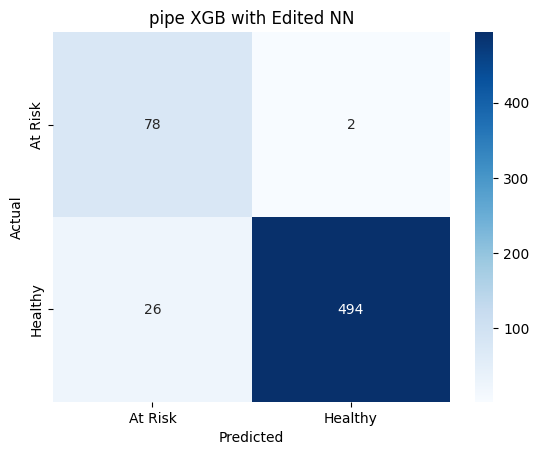

In [74]:
cm = confusion_matrix(y_test, y_pred__xgb_pipe_enn)
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['At Risk', 'Healthy'],  yticklabels=['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('pipe XGB with Edited NN')

In [75]:
print(classification_report(y_test, y_pred__xgb_pipe_enn, digits=3))

              precision    recall  f1-score   support

           0      0.750     0.975     0.848        80
           1      0.996     0.950     0.972       520

    accuracy                          0.953       600
   macro avg      0.873     0.962     0.910       600
weighted avg      0.963     0.953     0.956       600



#### Training ( 0.5 )

In [76]:
print(classification_report(y_train, xgb_pipe_enn.predict(x_train), digits=3))

              precision    recall  f1-score   support

           0      0.695     0.997     0.819       318
           1      0.999     0.933     0.965      2082

    accuracy                          0.942      2400
   macro avg      0.847     0.965     0.892      2400
weighted avg      0.959     0.942     0.946      2400



Text(0.5, 1.0, 'Training -> pipe XGB with Edited NN')

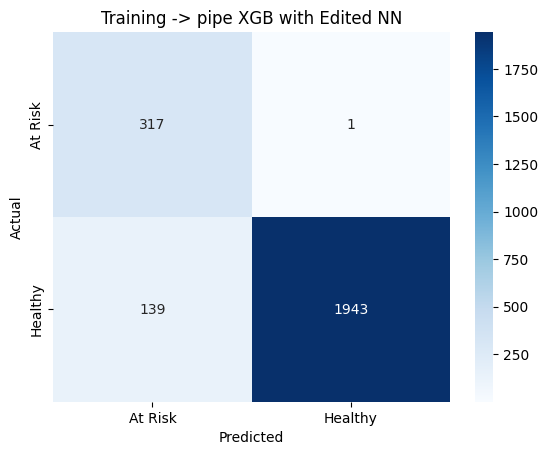

In [77]:
cm = confusion_matrix(y_train, xgb_pipe_enn.predict(x_train))
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['At Risk', 'Healthy'],  yticklabels=['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training -> pipe XGB with Edited NN')

In [78]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_probs = xgb_pipe_enn.predict_proba(x_test)[:, 0]

thresholds = np.arange(0.1, 0.91, 0.05)

print(' (class 0) ')
for t in thresholds:
    # y_pred = (y_probs <= t).astype(int)  
    y_pred = []
    for p in y_probs:
        if p >= t:
            y_pred.append(0)   # predict At Risk (0)
        else:
            y_pred.append(1)   # predict Healthy (1)
    
    print(f"Threshold={t:.2f} | "
          f"F1 = {f1_score(y_test, y_pred, pos_label=0):.3f}, "
          f"Precision = {precision_score(y_test, y_pred, pos_label=0):.3f}, "
          f"Recall = {recall_score(y_test, y_pred, pos_label=0):.2f} ")

 (class 0) 
Threshold=0.10 | F1 = 0.838, Precision = 0.721, Recall = 1.00 
Threshold=0.15 | F1 = 0.847, Precision = 0.734, Recall = 1.00 
Threshold=0.20 | F1 = 0.856, Precision = 0.748, Recall = 1.00 
Threshold=0.25 | F1 = 0.854, Precision = 0.752, Recall = 0.99 
Threshold=0.30 | F1 = 0.854, Precision = 0.752, Recall = 0.99 
Threshold=0.35 | F1 = 0.854, Precision = 0.752, Recall = 0.99 
Threshold=0.40 | F1 = 0.854, Precision = 0.752, Recall = 0.99 
Threshold=0.45 | F1 = 0.848, Precision = 0.750, Recall = 0.97 
Threshold=0.50 | F1 = 0.848, Precision = 0.750, Recall = 0.97 
Threshold=0.55 | F1 = 0.835, Precision = 0.745, Recall = 0.95 
Threshold=0.60 | F1 = 0.835, Precision = 0.745, Recall = 0.95 
Threshold=0.65 | F1 = 0.840, Precision = 0.752, Recall = 0.95 
Threshold=0.70 | F1 = 0.840, Precision = 0.752, Recall = 0.95 
Threshold=0.75 | F1 = 0.830, Precision = 0.760, Recall = 0.91 
Threshold=0.80 | F1 = 0.828, Precision = 0.766, Recall = 0.90 
Threshold=0.85 | F1 = 0.807, Precision = 0.

### Threshold Tuning

In [79]:
Threshold = 0.21

y_probs = xgb_pipe_enn.predict_proba(x_test)[:, 0]  # prob for class 0

y_pred_xgbenn = [0 if (i >= Threshold) else 1 for i in y_probs ]

Text(0.5, 1.0, 'pipe XGB with Edited NN -> Threshold 0.21')

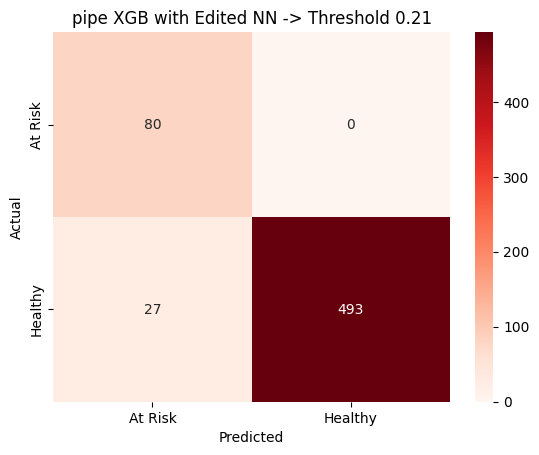

In [80]:
cm = confusion_matrix(y_test, y_pred_xgbenn)
sns.heatmap(cm, annot= True, cmap= 'Reds', fmt='d', xticklabels=['At Risk', 'Healthy'], yticklabels=['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('pipe XGB with Edited NN -> Threshold 0.21')

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_xgbenn, digits=3))
print(confusion_matrix(y_test, y_pred_xgbenn))

              precision    recall  f1-score   support

           0      0.748     1.000     0.856        80
           1      1.000     0.948     0.973       520

    accuracy                          0.955       600
   macro avg      0.874     0.974     0.914       600
weighted avg      0.966     0.955     0.958       600

[[ 80   0]
 [ 27 493]]


### Training ( 0.21 )

In [82]:
Threshold = 0.21

y_proba_train = xgb_pipe_enn.predict_proba(x_train)[:, 0]

y_pred_proba_train = [0 if (i >= Threshold) else 1 for i in y_proba_train]

Text(0.5, 1.0, 'pipe XGB with Edited NN -> Threshold 0.21')

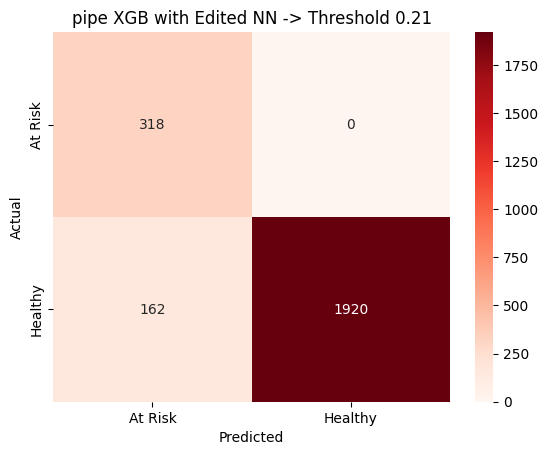

In [83]:
cm = confusion_matrix(y_train, y_pred_proba_train)
sns.heatmap(cm, annot= True, cmap= 'Reds', fmt='d', xticklabels=['At Risk', 'Healthy'], yticklabels=['At Risk', 'Healthy'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('pipe XGB with Edited NN -> Threshold 0.21')

In [84]:
print(classification_report(y_train, y_pred_proba_train, digits=3))
print(confusion_matrix(y_train, y_pred_proba_train))

              precision    recall  f1-score   support

           0      0.662     1.000     0.797       318
           1      1.000     0.922     0.960      2082

    accuracy                          0.932      2400
   macro avg      0.831     0.961     0.878      2400
weighted avg      0.955     0.932     0.938      2400

[[ 318    0]
 [ 162 1920]]


#### ROC-AUC curve

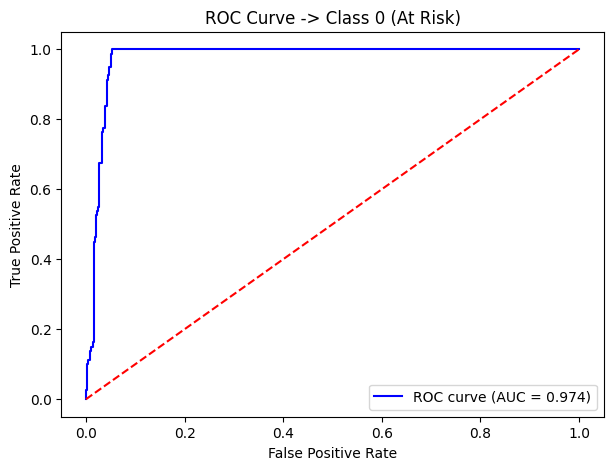

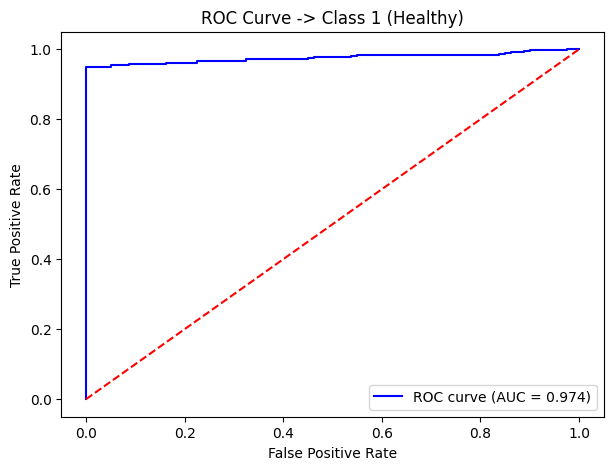

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_proba_xgb = xgb_pipe_enn.predict_proba(x_test)[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, xgb_pipe_enn.predict_proba(x_test)[:, 0], pos_label = 0)    # roc curve values

auc_score = roc_auc_score(y_test, y_pred_xgbenn)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -> Class 0 (At Risk)')
plt.legend(loc="lower right")
plt.show()

fpr, tpr , thresholds =  roc_curve(y_test, xgb_pipe_enn.predict_proba(x_test)[:, 1], pos_label = 1)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')                  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -> Class 1 (Healthy)')
plt.legend(loc="lower right")
plt.show()

Training

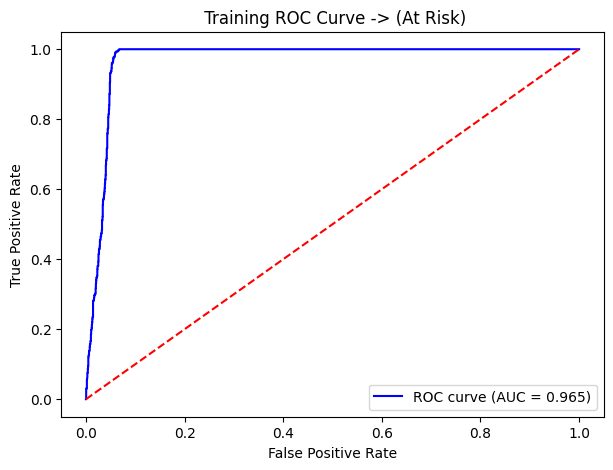

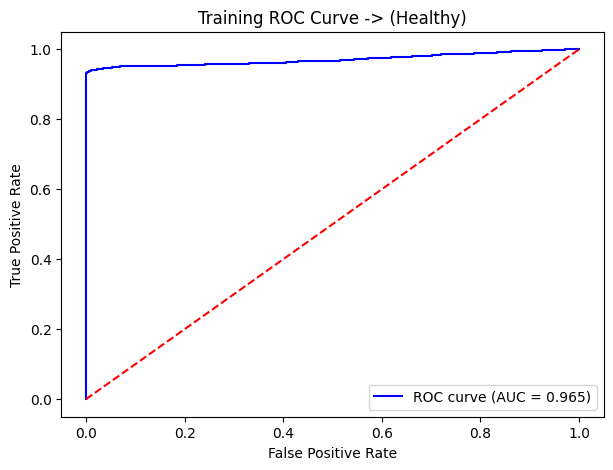

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_proba_xgb = xgb_pipe_enn.predict_proba(x_test)[:, 0]

auc_score = roc_auc_score(y_train, xgb_pipe_enn.predict(x_train))

fpr, tpr, thresholds = roc_curve(y_train, xgb_pipe_enn.predict_proba(x_train)[:, 0], pos_label = 0)    # roc curve values

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Training ROC Curve -> (At Risk)')
plt.legend(loc="lower right")
plt.show()

fpr, tpr , thresholds =  roc_curve(y_train, xgb_pipe_enn.predict_proba(x_train)[:, 1], pos_label = 1)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')                     
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve -> (Healthy)')
plt.legend(loc="lower right")
plt.show()

In [87]:
results = pd.DataFrame({
    "y_test": y_test,
    "y_prob_class0": y_probs,
    "y_pred": y_pred_xgbenn
})
results.tail(20)

,y_test,y_prob_class0,y_pred
1230,1,0.015748,1
2954,1,0.001352,1
1235,0,0.996278,0
2903,1,0.000531,1
294,1,0.007777,1
1884,1,0.001332,1
1147,1,0.150923,1
1119,1,0.002595,1
522,1,0.008455,1
2582,1,0.992631,0


In [88]:
results.loc[2582 , :]

y_test           1.000000
y_prob_class0    0.992631
y_pred           0.000000
Name: 2582, dtype: float64

#### Actual value -> Healthy

#### predicted -> At Risk

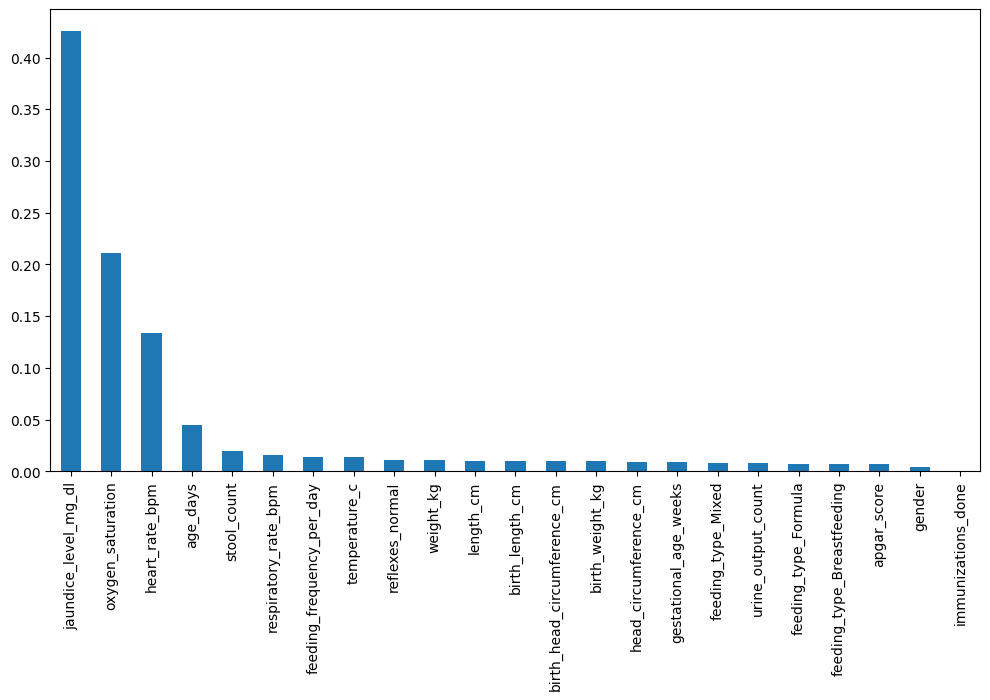

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(xgb_pipe_enn.named_steps['clf'].feature_importances_,
                             index=x_test.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.show()

Jaundice level (mg/dL) → 0.4615 (~46%)

Oxygen saturation → 0.2090 (~21%)

Heart rate (bpm) → 0.1430 (~14%)

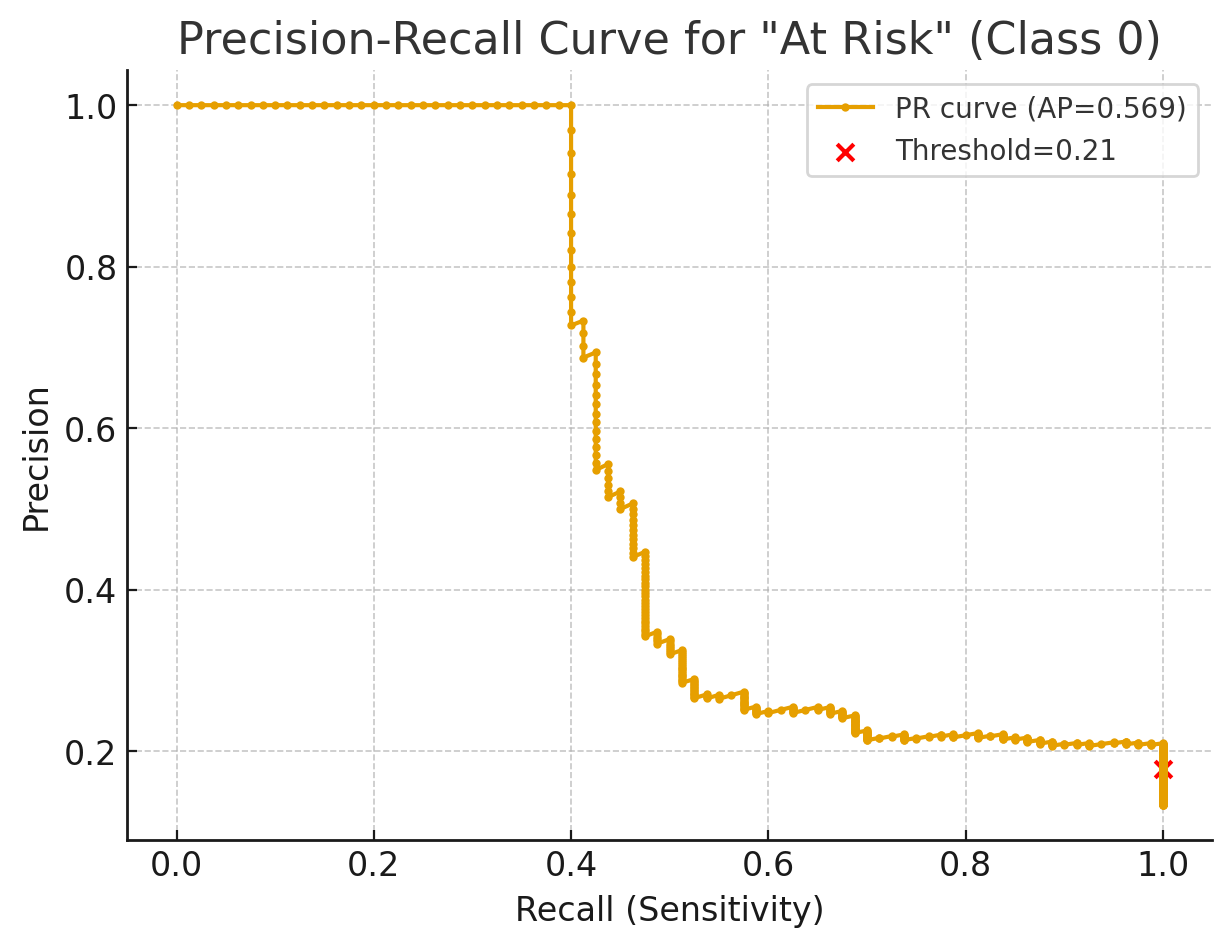

### Saving best model

In [90]:
import pickle

In [91]:
best_model = xgb_pipe_enn 

In [92]:
file_name = 'best_model.pkl'

with open(file_name , 'wb') as f:
    pickle.dump(best_model, f)

Using joblib (better for large ML models)

In [93]:
# import joblib

# # Save model
# joblib.dump(best_model, "best_model.pkl")

# # Load model back
# loaded_model = joblib.load("best_model.pkl")

# # Test
# print(loaded_model.predict(X_test))

Streamlit

In [94]:
df.describe()

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed,risk_level_encoded
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,0.450000,38.878000,3.205000,49.717500,34.12175,2025-02-26 23:16:48.000000256,15.500000,3.670527,50.501700,34.437733,37.002933,139.713500,39.428667,97.473667,9.452000,6.470000,2.445667,3.656767,8.400000,0.066667,0.761000,0.338333,0.33200,0.329667,0.867333
min,0.000000,35.400000,1.860000,45.100000,31.20000,2024-08-23 00:00:00,1.000000,1.900000,45.050000,31.100000,36.200000,113.500000,25.500000,94.000000,7.000000,4.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,37.800000,2.870000,48.475000,32.97500,2024-12-02 00:00:00,8.000000,3.220000,49.100000,33.300000,36.800000,133.000000,36.000000,97.000000,8.000000,5.000000,1.000000,2.500000,7.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,0.000000,38.800000,3.165000,49.550000,34.10000,2025-03-01 00:00:00,15.500000,3.670000,50.400000,34.400000,37.000000,140.000000,39.000000,97.000000,9.000000,6.000000,2.000000,3.300000,8.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,40.100000,3.625000,51.025000,34.80000,2025-05-19 06:00:00,23.000000,4.100000,51.800000,35.300000,37.200000,146.000000,43.000000,98.000000,11.000000,8.000000,4.000000,4.300000,9.250000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,43.000000,4.470000,54.850000,37.53750,2025-09-17 00:00:00,30.000000,5.410000,55.850000,38.300000,38.100000,173.000000,53.500000,100.000000,12.000000,9.000000,5.000000,7.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
std,0.497577,1.570076,0.561555,2.120098,1.47074,NaN,8.656884,0.621086,2.176559,1.495830,0.309144,10.013853,4.982455,1.040353,1.703721,1.698645,1.697452,1.728851,1.157777,0.249485,0.426544,0.473221,0.47101,0.470170,0.339271


In [95]:
x_train.head()

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
2748,1,35.9,3.07,50.3,31.2,19.0,3.65,51.2,31.7,37.2,145.0,43.0,98.0,9.0,6.0,4.0,2.8,7.0,0,1,1,0,0
2146,1,40.2,2.75,51.4,33.8,17.0,3.32,52.3,34.2,37.3,122.0,46.0,97.0,7.0,9.0,2.0,1.7,10.0,0,1,1,0,0
2026,0,40.8,2.80,48.1,34.7,17.0,3.33,49.2,35.1,37.1,146.0,45.0,98.0,11.0,9.0,4.0,3.9,10.0,0,1,1,0,0
417,0,40.3,2.27,47.4,34.1,28.0,3.11,48.6,34.8,37.1,149.0,42.0,97.0,12.0,5.0,1.0,3.8,10.0,0,0,0,1,0
2009,0,41.1,3.52,50.4,36.9,30.0,4.38,52.1,37.6,37.1,154.0,35.0,97.0,7.0,4.0,2.0,3.0,8.0,1,1,0,0,1


## Validation

In [96]:
new_1 = [0,	37.7,	2.90,	49.0,	33.5,	20.0,	3.46,	50.1,	33.8,	37.1,	144.0,	36.0,	97.0,	8.0	,7.0	,0.0	,4.6,	8.0	,0	,1	,0	,0	,1]
cols = ['gender',	'gestational_age_weeks',	'birth_weight_kg',	'birth_length_cm',	'birth_head_circumference_cm',	'age_days',	'weight_kg',	'length_cm',	'head_circumference_cm',	'temperature_c',	'heart_rate_bpm',	'respiratory_rate_bpm',	'oxygen_saturation',	'feeding_frequency_per_day',	'urine_output_count',	'stool_count',	'jaundice_level_mg_dl',	'apgar_score',	'immunizations_done',	'reflexes_normal',	'feeding_type_Breastfeeding',	'feeding_type_Formula',	'feeding_type_Mixed']

new_df = pd.DataFrame([new_1], columns= cols)
new_df

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
0,0,37.7,2.9,49.0,33.5,20.0,3.46,50.1,33.8,37.1,144.0,36.0,97.0,8.0,7.0,0.0,4.6,8.0,0,1,0,0,1


In [97]:
if xgb_pipe_enn.predict(new_df) == 1:
    print('Healthy')
    
else:
    print('At Risk')

Healthy


In [98]:
new_data = [0,	29,	5.4,	50,	37.3,  28.0,	6.39,	58.4, 9.0,	37.4,	123.0,	52.0,	87.0,	10.0,	5.0,	2.4,	2.1,	6.0,	0,	0, 0,	0,	1]
cols = ['gender',	'gestational_age_weeks',	'birth_weight_kg',	'birth_length_cm',	'birth_head_circumference_cm',	'age_days',	'weight_kg',	'length_cm',	'head_circumference_cm',	'temperature_c',	'heart_rate_bpm',	'respiratory_rate_bpm',	'oxygen_saturation',	'feeding_frequency_per_day',	'urine_output_count',	'stool_count',	'jaundice_level_mg_dl',	'apgar_score',	'immunizations_done',	'reflexes_normal',	'feeding_type_Breastfeeding',	'feeding_type_Formula',	'feeding_type_Mixed']

new_df1 = pd.DataFrame([new_data], columns= cols)
new_df1

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,feeding_type_Breastfeeding,feeding_type_Formula,feeding_type_Mixed
0,0,29,5.4,50,37.3,28.0,6.39,58.4,9.0,37.4,123.0,52.0,87.0,10.0,5.0,2.4,2.1,6.0,0,0,0,0,1


In [99]:
if xgb_pipe_enn.predict(new_df1) == 1:
    print('Healthy')
    
else:
    print('At Risk')

At Risk


In [100]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

params = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",    # or 'auc' or custom
    "eta": 0.05,               # learning_rate
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "gamma": 0,
    "min_child_weight": 1,
    "lambda": 1,
    "alpha": 0.0,
}

dtrain = xgb.DMatrix(x_train, label=y_train)
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,
    nfold=5,
    early_stopping_rounds=50,
    stratified=True,
    seed=42,
    metrics="aucpr",   # pick metric important to you
    as_pandas=True,
    verbose_eval=50
)
print("Best n_estimators:", len(cv_results))


[0]	train-aucpr:0.99439+0.00096	test-aucpr:0.99256+0.00236
[50]	train-aucpr:0.99945+0.00004	test-aucpr:0.99594+0.00114
[100]	train-aucpr:0.99978+0.00004	test-aucpr:0.99606+0.00125
[149]	train-aucpr:0.99996+0.00002	test-aucpr:0.99600+0.00109
Best n_estimators: 100


In [101]:
# from imblearn.pipeline import Pipeline
# # from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import EditedNearestNeighbours
# # from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# # Custom scorer for class 0 (At Risk)
# f1_class0 = make_scorer(f1_score, pos_label=0)

# # Pipeline: SMOTE happens inside each CV fold
# pipe = Pipeline([
#     ('Edited NN', EditedNearestNeighbours()),
#     ('clf', XGBClassifier(random_state=42))
# ])

# param_grid = {
#     'clf__n_estimators': [100, 200, 300],
#     'clf__max_depth': [3, 5],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__subsample': [0.8, 1.0],
#     'clf__colsample_bytree': [0.8, 1.0],
#     'clf__min_child_weight': [1, 3],
#     'clf__gamma': [0, 0.1],
#     'clf__reg_alpha': [0, 0.01],
#     'clf__reg_lambda': [1, 1.5] 
# }


# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, param_grid, scoring=f1_class0, cv=cv, n_jobs=-1)
# gs.fit(x_train, y_train)

# print("Best params:", gs.best_params_)
# print("Best CV f1 (class0):", gs.best_score_)

Best params: {'clf__colsample_bytree': 1.0, 'clf__gamma': 0.1, 'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__min_child_weight': 3, 'clf__n_estimators': 300, 'clf__reg_alpha': 0.01, 'clf__reg_lambda': 1, 'clf__subsample': 1.0}
Best CV f1 (class0): 0.7881987027678085

0.78819

In [102]:
# e_300 = gs.best_estimator_

# pred_300 = e_300.predict(x_test)

# print(classification_report(y_test, pred_300, digits=3))

            precision    recall  f1-score   support

           0       0.75      0.96      0.84        80
           1       0.99      0.95      0.97       520

    accuracy                           0.95       600
   macro avg       0.87      0.96      0.91       600
weighted avg       0.96      0.95      0.95       600

In [103]:
# e_300 = gs.best_estimator_

# pred_300 = e_300.predict(x_train)

# print(classification_report(y_train, pred_300, digits=3))

            precision    recall  f1-score   support

           0       0.70      1.00      0.82       318
           1       1.00      0.93      0.97      2082

    accuracy                           0.94      2400
   macro avg       0.85      0.97      0.89      2400
weighted avg       0.96      0.94      0.95      2400

In [104]:
# from imblearn.pipeline import Pipeline
# # from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import EditedNearestNeighbours
# # from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# # Custom scorer for class 0 (At Risk)
# f1_class0 = make_scorer(f1_score, pos_label=0)

# # Pipeline: Edited NN happens inside each CV fold
# pipe = Pipeline([
#     ('Edited NN', EditedNearestNeighbours()),
#     ('clf', XGBClassifier(random_state=42))
# ])

# param_grid = {
#     'clf__n_estimators': [100, 200, 300],
#     'clf__max_depth': [3, 5],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__subsample': [0.8, 1.0],
#     'clf__colsample_bytree': [0.8, 1.0],
#     'clf__min_child_weight': [1, 3],
#     'clf__gamma': [0, 0.1],
#     'clf__reg_alpha': [0, 0.01, 0.1, 0.5],
#     'clf__reg_lambda': [1, 1.5, 2, 2.5] 
# }


# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, param_grid, scoring=f1_class0, cv=cv, n_jobs=-1)
# gs.fit(x_train, y_train)

# print("Best params:", gs.best_params_)
# print("Best CV f1 (class0):", gs.best_score_)

In [105]:
# x = XGBClassifier(colsample_bytree= 1.0, gamma = 0, learning_rate = 0.1, max_depth = 5, min_child_weight= 3, n_estimators= 300, reg_alpha =  0.1, reg_lambda=  2.5, subsample= 0.8)

# x_res, y_res = EditedNearestNeighbours().fit_resample(x_train, y_train)
# x.fit(x_res, y_res)
# p = x.predict(x_test)
# f1_score(y_test, p, pos_label=0)

In [106]:
# print(classification_report(y_test, p, digits=3))
# confusion_matrix(y_test,p)

                precision    recall  f1-score   support

           0      0.748     0.963     0.842        80
           1      0.994     0.950     0.971       520

    accuracy                          0.952       600
   macro avg      0.871     0.956     0.907       600
weighted avg      0.961     0.952     0.954       600

In [107]:
# print(classification_report(y_train, x.predict(x_train), digits=3))
# confusion_matrix(y_train, x.predict(x_train))

                precision    recall  f1-score   support

           0       0.70      1.00      0.82       318
           1       1.00      0.93      0.97      2082

    accuracy                           0.94      2400
   macro avg       0.85      0.97      0.89      2400
weighted avg       0.96      0.94      0.95      2400

In [108]:
# gs.best_estimator_

# pred_300 = e_300.predict(x_test)

# print(classification_report(y_test, pred_300, digits=3))

In [109]:
# from imblearn.pipeline import Pipeline
# # from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import EditedNearestNeighbours
# # from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# # Custom scorer for class 0 (At Risk)
# f1_class0 = make_scorer(f1_score, pos_label=0)

# # Pipeline: Edited NN happens inside each CV fold
# pipe = Pipeline([
#     ('Edited NN', EditedNearestNeighbours()),
#     ('clf', XGBClassifier(random_state=42))
# ])

# param_grid = {
#     'clf__n_estimators': [100, 200, 300],
#     'clf__max_depth': [3, 5],
#     'clf__learning_rate': [0.05, 0.1],
#     'clf__subsample': [0.8],
#     'clf__colsample_bytree': [1.0],
#     'clf__min_child_weight': [1, 3],
#     'clf__gamma': [0, 0.1],
#     'clf__reg_alpha': [0.1],
#     'clf__reg_lambda': [2.5] 
# }


# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, param_grid, scoring=f1_class0, cv=cv, n_jobs=-1)
# gs.fit(x_train, y_train)

# print("Best params:", gs.best_params_)
# print("Best CV f1 (class0):", gs.best_score_)

In [110]:
# x1 = XGBClassifier(colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.1, reg_lambda=2.5, subsample= 0.8)
# x_res1, y_res1 = EditedNearestNeighbours().fit_resample(x_train, y_train)
# x1.fit(x_res1, y_res1)

# p1 = x1.predict(x_test)
# print(classification_report(y_test, p1, digits=3))
# print(confusion_matrix(y_test, p1))

In [111]:
# print(classification_report(y_train, x1.predict(x_train), digits=3))
# confusion_matrix(y_train, x.predict(x_train))